In [7]:
import sys
sys.path.insert(0, '../scripts')

import pandas as pd
import direction_transition as dit
import paths
from preprocessing import read_csv_clean

In [28]:
proportion = 0.3

ctrl_scores = []
for path in paths.reversal_ivsa_ctrl:
        data_dropped = read_csv_clean(path, remove_trivial=False)
        blocks = dit.split_data_to_blocks(data_dropped)
        # data_stats = dit.get_transition_info(blocks)
        # dit.graph_tranition_stats(data_stats, blocks, path)
        ctrl_scores.append(dit.learning_score(blocks, proportion=proportion))

In [29]:
exp_scores = []

for path in paths.reversal_ivsa_exp:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    # dit.graph_tranition_stats(data_stats, blocks, path)
    exp_scores.append(dit.learning_score(blocks, proportion=proportion))

In [24]:
ctrl_scores, exp_scores

([28.68943938032789,
  41.20561484067232,
  34.42203645818249,
  40.584279198573604,
  36.9618147300768,
  39.82507804121411],
 [40.98213887206582,
  36.44628247685769,
  37.97174965143715,
  41.08246735458498,
  36.679138952640585,
  39.350373075501636,
  36.20254120833689])

P Value is  0.03793967901284371
Experiment group is significantly greater than control group


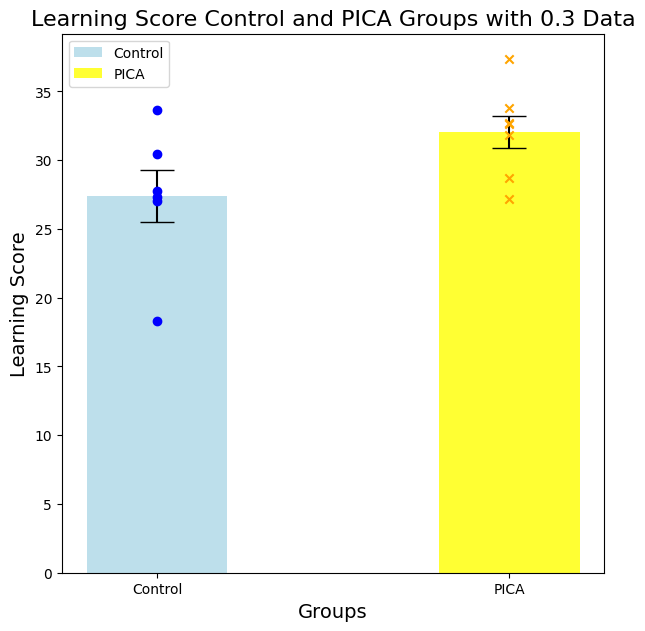

In [30]:
import intervals as invs

invs.perform_T_test(ctrl_scores, exp_scores, test_side='greater')
dit.graph_learning_score(ctrl_scores, exp_scores, proportion=proportion, exp_group_name='PICA')